This Notebook (mercury2.ipynb) is the same code as mercury1.ipynb, but with almost everything in one cell to make running it easier.
Your mission is (a) to modify the code so that it plots Mercury's orbit (x vs. y) over 2 years. And then (b) to plot Mercury's orbit for 100,000 years. You should be able to see Mercury's orbit precessing due to Jupiter. (Double-check that if you remove Jupiter, then Mercury's orbit doesn't precess).  Note: for part(b), switch from IAS15 to whfast to make it run faster.  And it will make the plot prettier to put '.' instead of '-.' in the command plt.plot.   

In [1]:
import rebound 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#This tells python to use rebound and two other standard libraries that we will be using

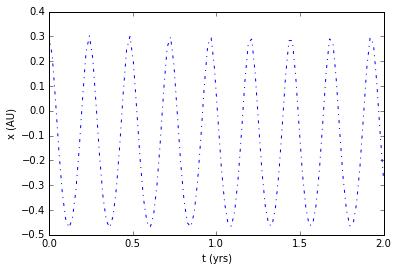

In [2]:
rebound.reset(); 
rebound.G=4*np.pi*np.pi;   
rebound.integrator = 'IAS15';
rebound.add(m=1) # The Sun is at the center of our coordinate system and has a mass of 1.
rebound.add(m=1.66e-07, a=0.387, e=0.206) # Mercury
rebound.add(m=0.000955, a=5.20, e=0.0484) # Jupiter
rebound.move_to_com()
Noutputs = 100;
times = np.linspace(0,2,Noutputs) # This sets the "times" variable to be an array made up of 100 evenly spaced output times between 0 and 2.
x_mercury = np.zeros(Noutputs) #This makes an array made up of zeros. We will be 'filling up' this array shortly with the x-position of Mercury
vy_sun = np.zeros(Noutputs) #We will be filling up this array with the y-velocity of the Sun
for i,t in enumerate(times):
    rebound.integrate(t)         # Integrate forward in time by a month
    x_mercury[i] = rebound.particles[1].x  # Mercury is particle 1 in the list of particles. And the ".x" at the end says to use the x-position    
    vy_sun[i] = rebound.particles[0].vy #The sun is particle 0
plt.plot(times,x_mercury,'-.');
plt.xlabel('t (yrs)'); plt.ylabel('x (AU)');    